<a href="https://colab.research.google.com/github/vishwajeet1024/Practice-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection  and processing


In [41]:
# loading the csv dataset to the pandas dataFrame
gold_price_dataset =pd.read_csv("/content/drive/MyDrive/Dataset/gld_price_data.csv")

# printing the first 5 rows of the dataset
gold_price_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [42]:
# checking no of rows and columns
gold_price_dataset.shape

(2290, 6)

In [43]:
# getting some information about data
gold_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [44]:
# checking for missing value
gold_price_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [45]:
# getting statistical measures of the data
gold_price_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [46]:
# convert date time column to datetime formate
gold_price_dataset['Date'] = pd.to_datetime(gold_price_dataset['Date'])

gold_price_dataset['Year'] = gold_price_dataset['Date'].dt.year
gold_price_dataset['Month'] = gold_price_dataset['Date'].dt.month
gold_price_dataset['Day'] = gold_price_dataset['Date'].dt.day

gold_price_dataset = gold_price_dataset.drop('Date', axis=1)

In [47]:
gold_price_dataset.head()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


Correlation

  1. Positive Correlation
  2. Negative Correlation

In [48]:
correlation = gold_price_dataset.corr()

<Axes: >

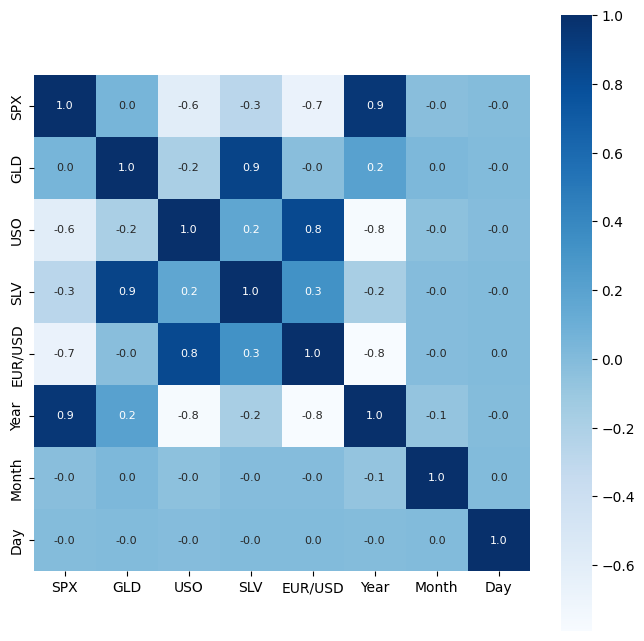

In [49]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar =True, square =True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap ='Blues')

In [50]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


/tmp/ipython-input-3377322012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_price_dataset['GLD'], color = 'blue')


<Axes: xlabel='GLD', ylabel='Density'>

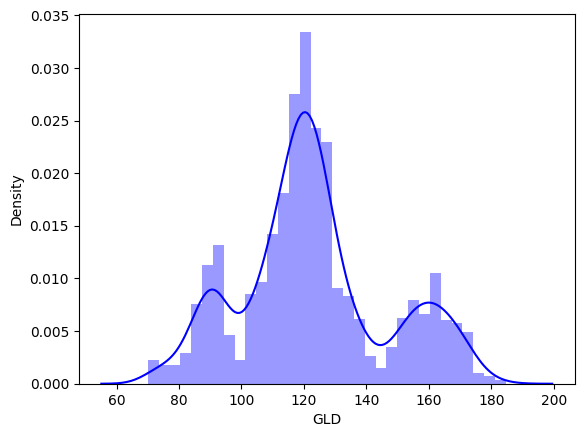

In [51]:
# checking the distribution of the GLD Price
sns.distplot(gold_price_dataset['GLD'], color = 'blue')

Splitting the Features and the target

In [54]:
X = gold_price_dataset.drop(['Year', 'Month', 'Day', 'GLD'], axis =1)
Y = gold_price_dataset['GLD']

Spliting into Training data and test Data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)


Model Training: Random Forest Regressor

In [60]:
regressor = RandomForestRegressor(n_estimators = 100)

In [61]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [62]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.35319933  82.34589975 115.94090012 127.58400097 120.83120101
 154.70329756 150.57859855 126.08240036 117.53409873 126.03060032
 116.96980084 171.85890076 141.35679782 167.88159849 115.20520022
 117.45100012 138.5386026  170.443601   159.24310384 156.5559995
 155.09480035 125.22070015 175.21309991 156.75220338 125.17930048
  93.68339953  77.56500036 120.47250001 119.18719978 167.50049985
  88.09710013 125.1940001   91.0955008  117.69790012 121.25349892
 135.95350057 115.47860134 115.3497007  149.29110003 107.24900104
 104.53220235  87.10479777 126.58610061 118.03340024 152.90559863
 119.52150006 108.35260009 108.19559885  93.11580027 127.06579791
  75.35539998 113.5359993  121.26209987 111.30889898 118.89319896
 120.76999942 159.50319971 169.53140108 146.75789703  86.09149894
  94.48600016  86.87919847  90.4510003  119.02660077 126.35520041
 127.46909975 168.52140063 122.28019936 117.60019878  98.74100045
 168.08330189 143.30259861 132.35390253 121.3389025  121.14129969
 119.680500

In [67]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9884160288243719


Compare the Actual Values and Predicted Values in a Plot

In [68]:
Y_test = list(Y_test)

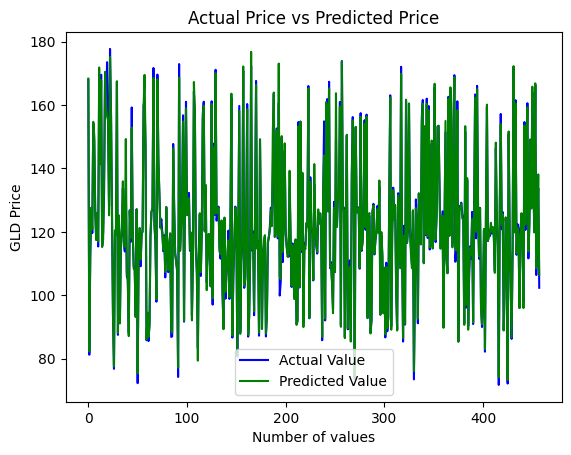

In [69]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()